## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

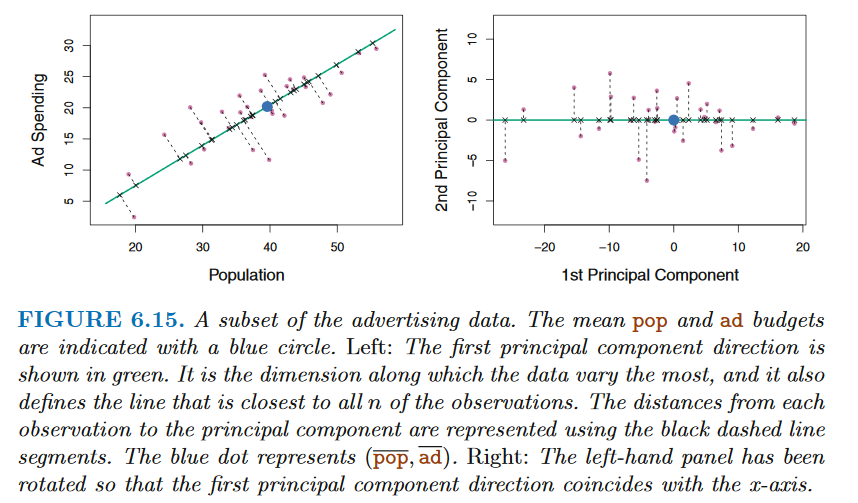

In [1]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


#### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

De esta manera se pueden construir las proyecciones de los datos $X$ en cada una de las $d$ componentes principales como:

$$z_{i1} = w_{11} x_{i1} + w_{12} x_{i2} + \cdots w_{1d} x_{id}$$
$$z_{i2} = w_{21} x_{i1} + w_{22} x_{i2} + \cdots w_{2d} x_{id}$$
$$\vdots$$
$$z_{id} = w_{d1} x_{i1} + w_{d2} x_{i2} + \cdots w_{dd} x_{id}$$

para $i=1,\cdots,n$

donde $$w_j = (w_{j1},\cdots,w_{jd}), \qquad j=1,\cdots,d$$

es el j-ésimo vector propio de la matriz de varianza empírica de $X$

de manera que $$Z_j = w_{j1} X_1 + w_{j2} X_2 + \cdots w_{jd} X_d$$ 

es la proyección de los datos en la $j-$ésima componenente principal, y se cumple que:

$$\hat{\sigma}^2(Z_1) \geq \hat{\sigma}^2(Z_2) \geq \cdots \geq \hat{\sigma}^2(Z_d)$$

<img src="../respuesta/1.png">

#### Ejercicio 2:
Muestre que $S$, la varianza empírica total de los datos $X$ cumple:
$$S \equiv  \sum_{j=1}^d \hat{\sigma}^2(X_j) = \sum_{j=1}^d \hat{\sigma}^2(Z_j)$$

###### Indicación:
Utilice la propiedad de la descomposición de una matriz $A$ en valores y vectores propios que establece que la traza de $A$ es igual a la suma de sus valores propios.

#### Selección del número de componentes principales
La propiedad anterior genera un criterio para decidir el número de componentes principales a considerar en función del porcentaje de varianza explicada. En efecto, la proporción de varianza explicada (PVE) por la m-ésima componente principal se puede calcular como:
$$PVE = \frac{\hat{\sigma}^2(Z_m)}{\sum_{j=1}^d \hat{\sigma}^2(X_j)}= \frac{ \sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{ \sum_{j=1}^d \sum_{i=1}^n{x_{ij}}^2}$$

De la demostración previa se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

<img src="../respuesta/2.png">

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [10]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


### Análisis Exploratorio de Datos

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

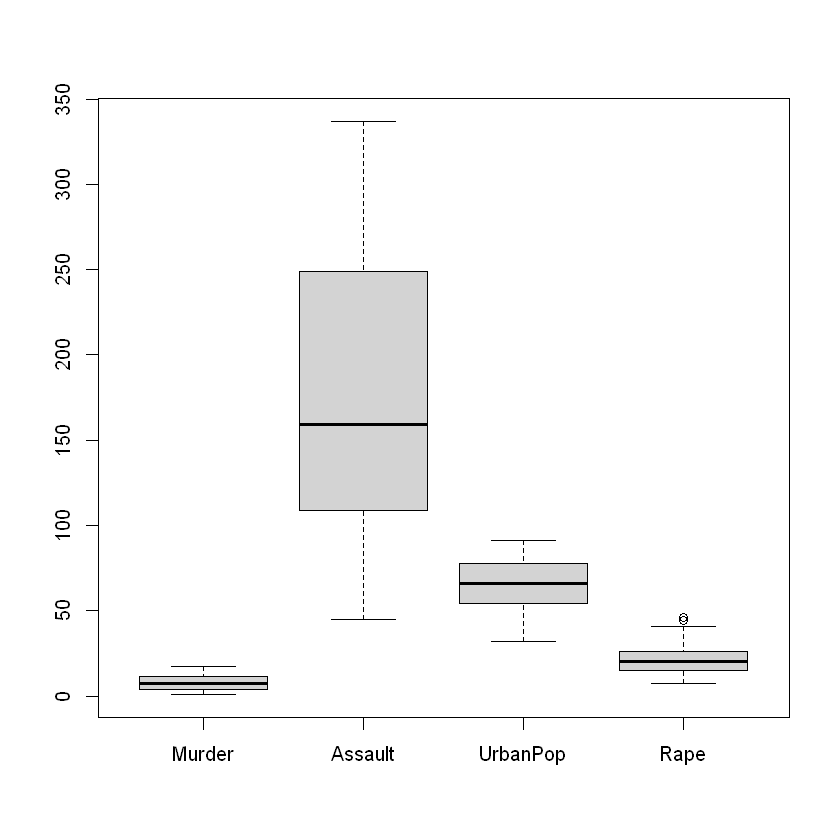

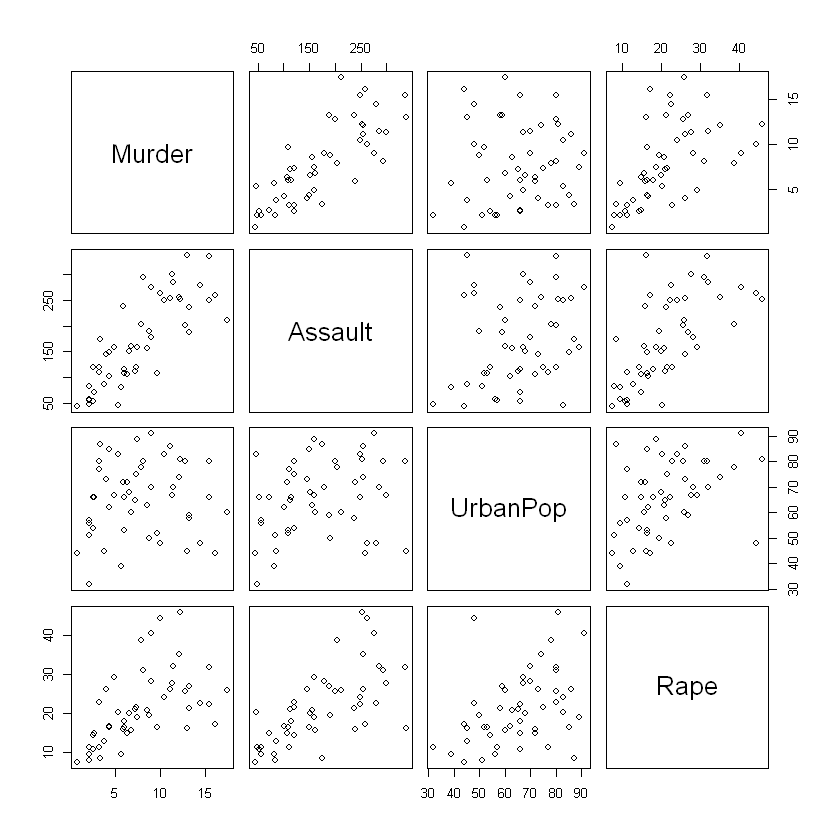

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


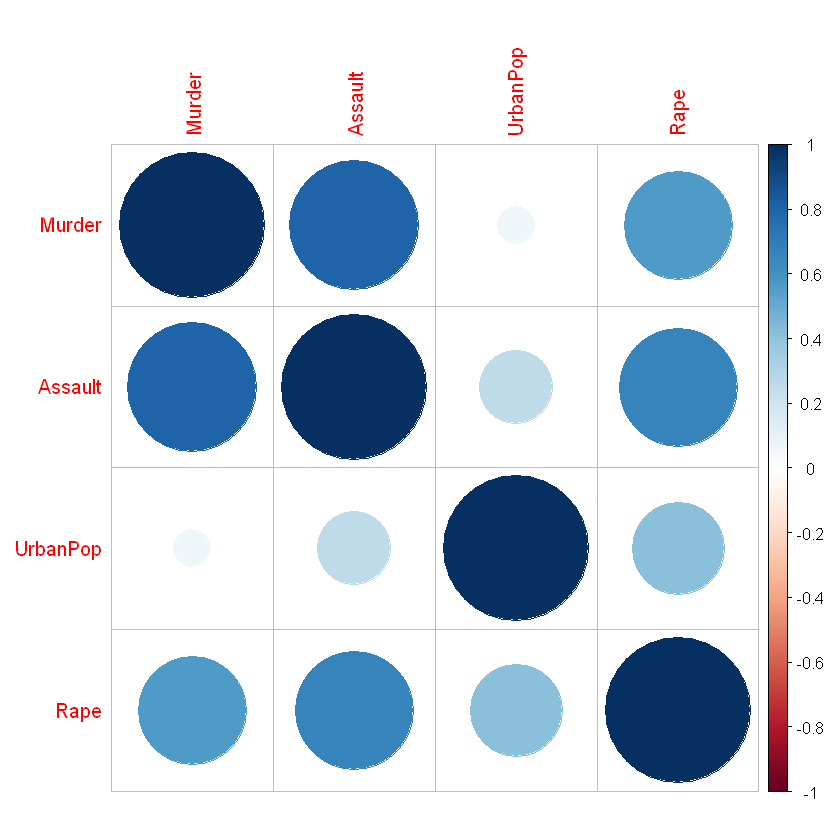

In [11]:
#install.packages('corrplot')
library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)
mcor<-cor(USArrests)
corrplot(mcor)
print(mcor)



In [12]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)



Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

In [13]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)

apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, si las escalas son comparables, el escalado puede no ser deseable, como se muestra en el ejemplo siguiente:


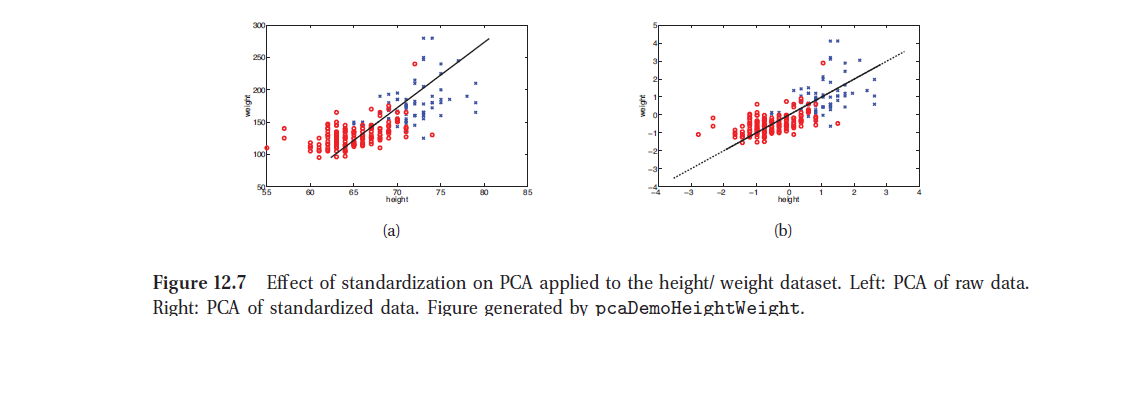

In [14]:
display_png(file="figura2.png")

En el caso de los datos en análisis, las variables Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, es decir se encuentran en la misma escala, no asi UrbanPop que se mide como un porcentaje de la población total. Y es por esto que hemos decidido escalar los datos.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA  dependerán de si las variables se han escalado individualmente o no.

In [15]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [16]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [17]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


In [23]:
#install.packages('ggplot2')
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

ERROR: Error in loadNamespace(x): there is no package called 'modelr'


In [24]:
#Cálculo de la varianza explicada
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

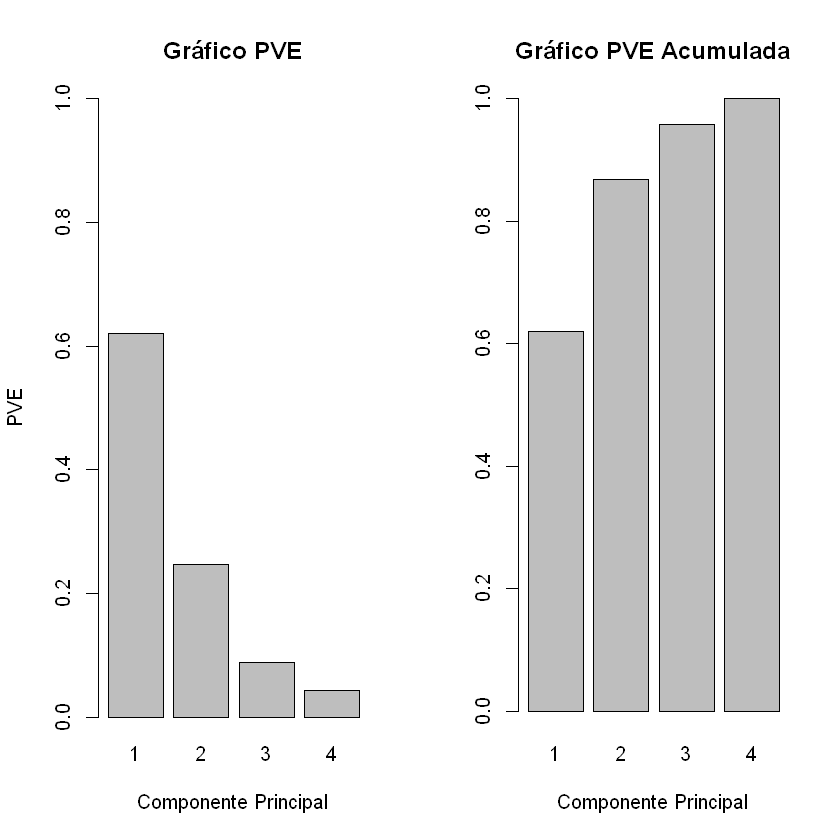

In [25]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [27]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

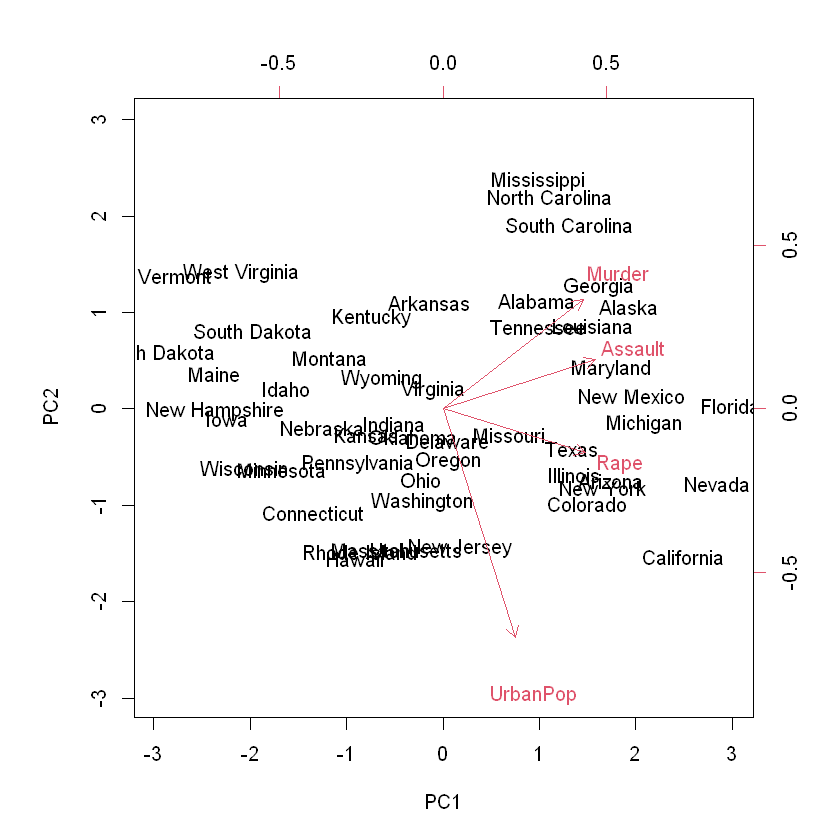

In [28]:
biplot(pca_res, scale = 0)

#### Ejercicio 3:
1. Explique como se obtienen las coordenadas de  variables y observaciones en este último gráfico y como se interpreta la representación obtenida.
2. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 
3. Utilice la función predefinida en R princomp y compare con prcomp.


1.R:
Murder y Assault estan muy cerca entre ellas, lo que podría indicar que si te asaltan es muy probable que te asesinen, lo mismo que para rape. Esto también indica que a medida que aumenta la población se tiende a asesinar menos, esto puede ser debido a mucho factores.
También se puede observar que hay un ángulo mayor a 90° entre asesinato y la población urbana, lo que podría indicar que hay una correlación negativa, al igual que el assault.

También podemos observar que las ciudades con mayores crímenes podrían ser florida, nevada y california debido a su cercanía con la parte derecha del gráfico. (Es la componente principal)
Texas, colorado, etc son ciudades con altos indices de violacion.
Maryland, new mexico, son ciudades con altos indices de asalto.
Georgia, alaska, alabama son ciudades con altos indices de asesinado.

2. R:
 Podemos observar que los valores son muy parecidos, con prcomp, tenemos que están redondeados a 7 decimales


<img src="../respuesta/3.png">

In [43]:

#2.
#prcomp
pca_res <- prcomp(USArrests, scale=TRUE)  #resultados 

print("Sub variables")
names(pca_res)
print("Desviación estandar")
pca_res$sdev # Entrega un vector dv relacionada a componentes principales


print("Tabla de datos (head(5))")
head(pca_res$x) # PC con 4 componentes principales



[1] "Sub variables"


[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] "Desviación estandar"


[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] "Tabla de datos (head(5))"


,PC1,PC2,PC3,PC4
Alabama,-0.9756604,-1.1220012,0.43980366,0.154696581
Alaska,-1.9305379,-1.0624269,-2.01950027,-0.434175454
Arizona,-1.7454429,0.7384595,-0.05423025,-0.826264240
Arkansas,0.1399989,-1.1085423,-0.11342217,-0.180973554
California,-2.4986128,1.5274267,-0.59254100,-0.338559240
Colorado,-1.4993407,0.9776297,-1.08400162,0.001450164


In [47]:
#3.
            
pca_res <- princomp(USArrests, cor= TRUE)
names(pca_res)
pca_res$sdev # ->Desv main components
pca_res$loadings # ->Matriz valores propios
pca_res$center # ->promedios
pca_res$scale # ->aplica escala
head(pca_res$scores) # Puntacion individual por ciudad
pca_res$call # toda la información


[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.9855659,1.1333924,0.44426879,0.156267145
Alaska,1.9501378,1.0732133,-2.04000333,-0.438583440
Arizona,1.7631635,-0.7459568,-0.05478082,-0.834652924
Arkansas,-0.1414203,1.1197968,-0.11457369,-0.182810896
California,2.5239801,-1.5429340,-0.59855680,-0.341996478
Colorado,1.5145629,-0.9875551,-1.09500699,0.001464887


princomp(x = USArrests, cor = TRUE)

3:
R: En general entregan una respuesta muy parecida, pero hay un cambio en como se trabajan. Basicamente prcomp debe estar escalado para ejecutarse de mananera correcta, en cambio princomp debe estar correlacionado.

[1] 100  35

Warning message in FUN(X[[i]], ...):
"input string 1 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 1 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 1 is invalid UTF-8"
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 1 is invalid UTF-8

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr

,Comuna,A1,A2,A3,A4,A5,A6,A7,A8,A9,⋯,S5,S6,S7,S8,S9,S10,S11,P1,E1,E2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IQUIQUE,238.7030,1.72,1961.235,0.84,81.49160,86.31254,2.13,1140.8336,16.34,⋯,6949,9.92,4.44,0.30,4.38,19.74,0.74,10.93,10.88373,29.65
2,ALTO HOSPICIO,185.2202,2.87,1846.297,1.14,77.13106,82.78525,3.29,878.0621,32.75,⋯,4978,15.32,3.19,2.41,7.76,27.55,0.67,8.83,63.36414,29.09
3,ANTOFAGASTA,224.1951,2.47,1375.518,1.03,54.05173,93.66913,2.31,1249.4364,6.44,⋯,13240,7.73,4.34,1.17,5.06,16.58,0.41,19.47,16.32580,25.43
4,CALAMA,816.2048,3.98,1902.088,1.18,78.97949,83.62586,4.17,1083.3625,12.69,⋯,4884,10.29,2.77,0.13,4.59,13.67,0.57,17.61,22.60442,28.32
5,COPIAP�,337.0193,3.92,1812.947,2.19,84.82275,86.97373,5.22,1270.2870,15.06,⋯,3609,7.76,2.37,2.75,6.26,23.33,0.45,25.54,36.16117,34.38
6,TIERRA AMARILLA,341.1337,7.72,2355.437,6.49,83.03797,59.28101,10.25,1576.5882,40.59,⋯,243,11.67,2.19,2.09,14.25,31.41,0.30,37.14,23.49085,56.45


       A1               A2              A3                 A4        
 Min.   : 171.0   Min.   :1.150   Min.   :   85.25   Min.   : 0.280  
 1st Qu.: 241.8   1st Qu.:2.877   1st Qu.: 1018.30   1st Qu.: 1.212  
 Median : 293.4   Median :3.955   Median : 1327.98   Median : 2.265  
 Mean   : 350.5   Mean   :4.448   Mean   : 1569.26   Mean   : 4.375  
 3rd Qu.: 397.0   3rd Qu.:5.747   3rd Qu.: 1885.94   3rd Qu.: 5.258  
 Max.   :1087.7   Max.   :9.880   Max.   :12088.14   Max.   :65.020  
       A5              A6                A7               A8         
 Min.   :26.21   Min.   :  1.068   Min.   : 1.250   Min.   :  367.0  
 1st Qu.:67.98   1st Qu.: 78.886   1st Qu.: 4.025   1st Qu.:  912.1  
 Median :80.39   Median : 92.159   Median : 5.190   Median : 1143.6  
 Mean   :76.05   Mean   : 85.266   Mean   : 6.378   Mean   : 1300.2  
 3rd Qu.:85.42   3rd Qu.: 99.868   3rd Qu.: 7.537   3rd Qu.: 1326.0  
 Max.   :97.09   Max.   :100.000   Max.   :18.670   Max.   :10449.5  
       A9           

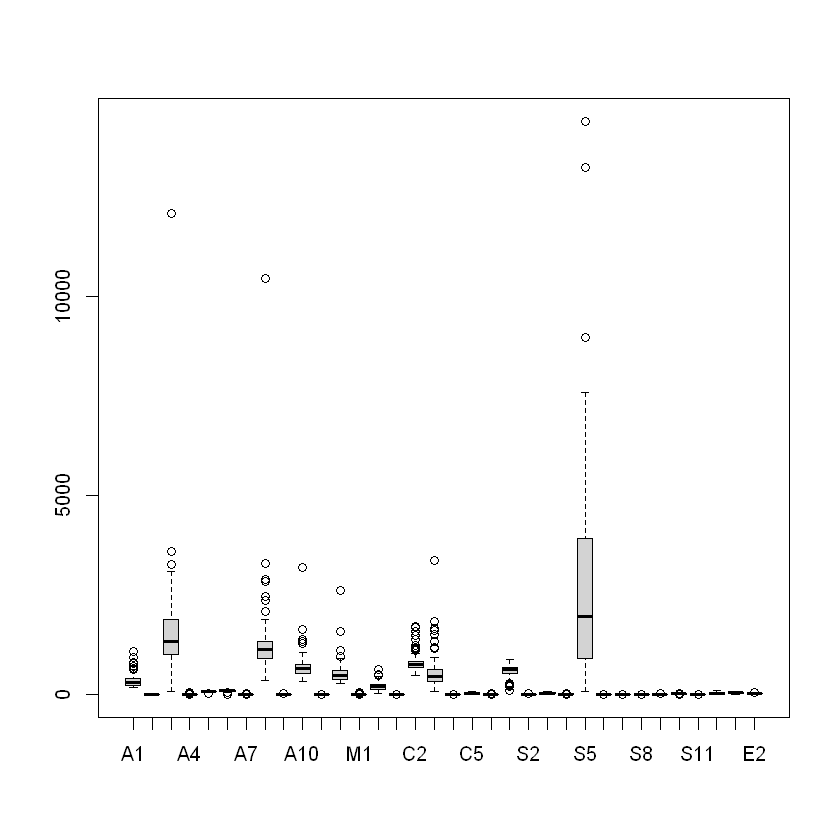

In [30]:
datos <- read.table("..//data//datosComunas.csv",sep=";",dec=",",header= TRUE)
dim(datos)
head(datos)
summary(datos[,2:35])
boxplot(datos[,2:35])

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995 -0.4181809  0.3412327  0.64922780
Assault  -0.5831836 -0.1879856  0.2681484 -0.74340748
UrbanPop -0.2781909  0.8728062  0.3780158  0.13387773
Rape     -0.5434321  0.1673186 -0.8177779  0.08902432

#### Ejercicio 4: 
Considere los datos de caracterización de la calidad  de vida urbana en 100 comunas de Chile, disponible en el archivo "datosComunas.csv", con la respectiva explicación de cada variable en "datosComunas.xlsx". 
1. Realice un análisis exploratorio de los datos y un primer análisis de componentes principales. Analice e interprete sus resultados.
2. Filtre los datos para analizar un grupo específico de comunas (al menos 30), o bien un conjunto específico de variables (al menos 10). Realice un nuevo Análisis de Componentes Principales para estos datos. Analice e interprete sus resultados.